#**TELCO CHURN CUSTOMER**
![alt text](https://www.pointillist.com/wp-content/uploads/2017/11/Running-4-the-Exit-2-844x422.png)

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. (Investopedia, 2020)

The data set includes information about:<br>
**Customers who left within the last month** – the column is called Churn<br>
**Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br>
**Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
**Demographic info about customers** – gender, age range, and if they have partners and dependents<br>

__Data Dictionary__:<br>
**customerID**: Customer ID<br>
**gender**: Whether the customer is a male or a female (Male, Female)<br>
**SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)<br>
**Partner**: Whether the customer has a partner or not (Yes, No)<br>
**Dependents**: Whether the customer has dependents or not (Yes, No)<br>
**tenure**: Number of months the customer has stayed with the company<br>
**PhoneService**: Whether the customer has a phone service or not (Yes, No)<br>
**MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)<br>
**InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)<br>
**OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)<br>
**OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)<br>
**DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)<br>
**TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)<br>
**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)<br>
**StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)<br>
**Contract**: The contract term of the customer (Month-to-month, One year, Two year)<br>
**PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)<br>
**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
**MonthlyCharges**: The amount charged to the customer monthly<br>
**TotalCharges**: The total amount charged to the customer<br>
**Churn**: Whether the customer churned or not (Yes or No)<br>

In [1]:
!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.utils import resample

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

#Loading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Telco Customer Churn/Telco.csv')
df.head()

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
Region              0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.describe(include='object')

,customerID,Region,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,1142-WACZW,Germany,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,6761,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Conclusion of understanding data:
* There is an invalid data type, namely TotalCharges, it should be in the form of a float.
* There is no missing value.
* Most of the data is in categorical form.

#DATA CLEANING

##Change Datatype

In [9]:
#Sort the TotalCharges table to check whether there is a value in the form of a string or not.
df.sort_values('TotalCharges').head()

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Germany,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Germany,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Germany,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Germany,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Germany,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


There is an empty TotalCharges value present in the form of a whitespace string (' ').

In [10]:
print('The number of rows that have TotalCharges data in the form of a whitespace string is {}%.'.format(len(df[df['TotalCharges']==' '])/(len(df))*100))

The number of rows that have TotalCharges data in the form of a whitespace string is 0.1561834445548772%.


Since the number of rows in the whitespace string is low, we will drop these rows.

In [11]:
null_charges = df[df['TotalCharges']==' '].index
df = df.drop(null_charges, axis = 0)
df

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Germany,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Germany,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Germany,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
#Change TotalCharges datatype to float
df['TotalCharges'] = df['TotalCharges'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Region            7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


#EXPLORATORY DATA ANALYSIS




##How many customer churn?

Percentage of customer churn:
No     73.42
Yes    26.58
Name: Churn, dtype: float64


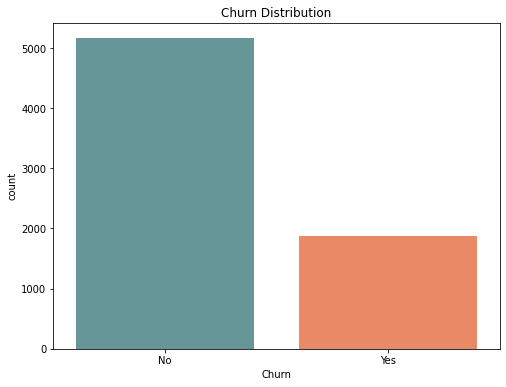

In [13]:
print("Percentage of customer churn:")
print(round(df['Churn'].value_counts(normalize=True) * 100,2))

plt.figure(figsize = (8,6))
ax = sns.countplot('Churn', data=df, palette=['cadetblue','coral'])
ax.set_title('Churn Distribution')
plt.show()

As many as 26.58% of customers stop subscribing to this provider (Churned Customer)

##Customer Distribution

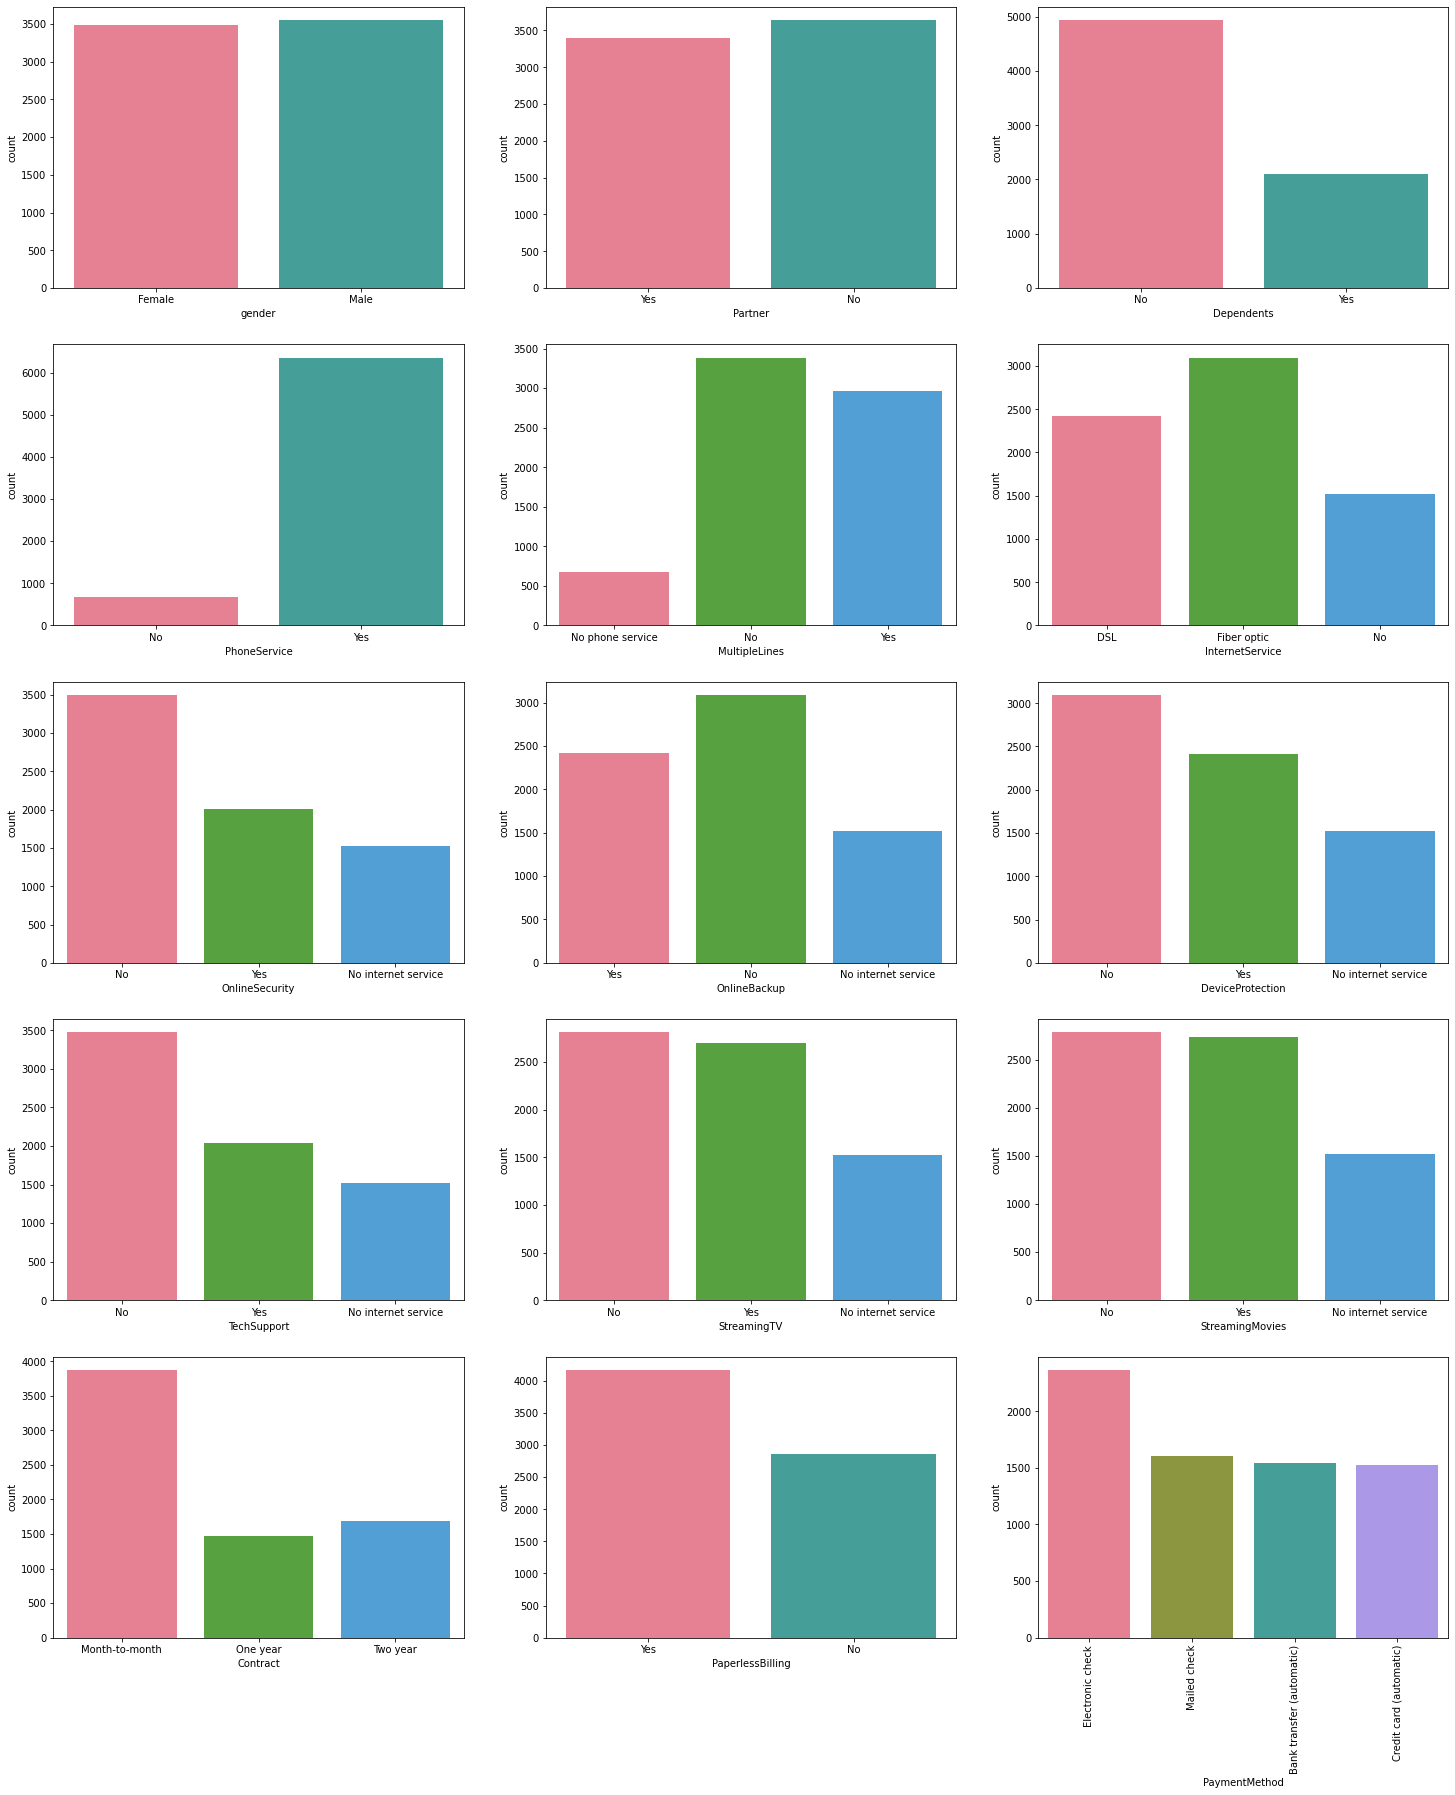

In [14]:
fig, axes = plt.subplots(nrows = 5,ncols = 3,figsize = (25,30))
sns.countplot(x = "gender", data = df, ax=axes[0][0], palette='husl')
sns.countplot(x = "Partner", data = df, ax=axes[0][1], palette='husl')
sns.countplot(x = "Dependents", data = df, ax=axes[0][2], palette='husl')
sns.countplot(x = "PhoneService", data = df, ax=axes[1][0], palette='husl')
sns.countplot(x = "MultipleLines", data = df, ax=axes[1][1], palette='husl')
sns.countplot(x = "InternetService", data = df, ax=axes[1][2], palette='husl')
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[2][0], palette='husl')
sns.countplot(x = "OnlineBackup", data = df, ax=axes[2][1], palette='husl')
sns.countplot(x = "DeviceProtection", data = df, ax=axes[2][2], palette='husl')
sns.countplot(x = "TechSupport", data = df, ax=axes[3][0], palette='husl')
sns.countplot(x = "StreamingTV", data = df, ax=axes[3][1], palette='husl')
sns.countplot(x = "StreamingMovies", data = df, ax=axes[3][2], palette='husl')
sns.countplot(x = "Contract", data = df, ax=axes[4][0], palette='husl')
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[4][1], palette='husl')
ax = sns.countplot(x = "PaymentMethod", data = df, ax=axes[4][2], palette='husl')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

##Distribution of customer churn on several variables

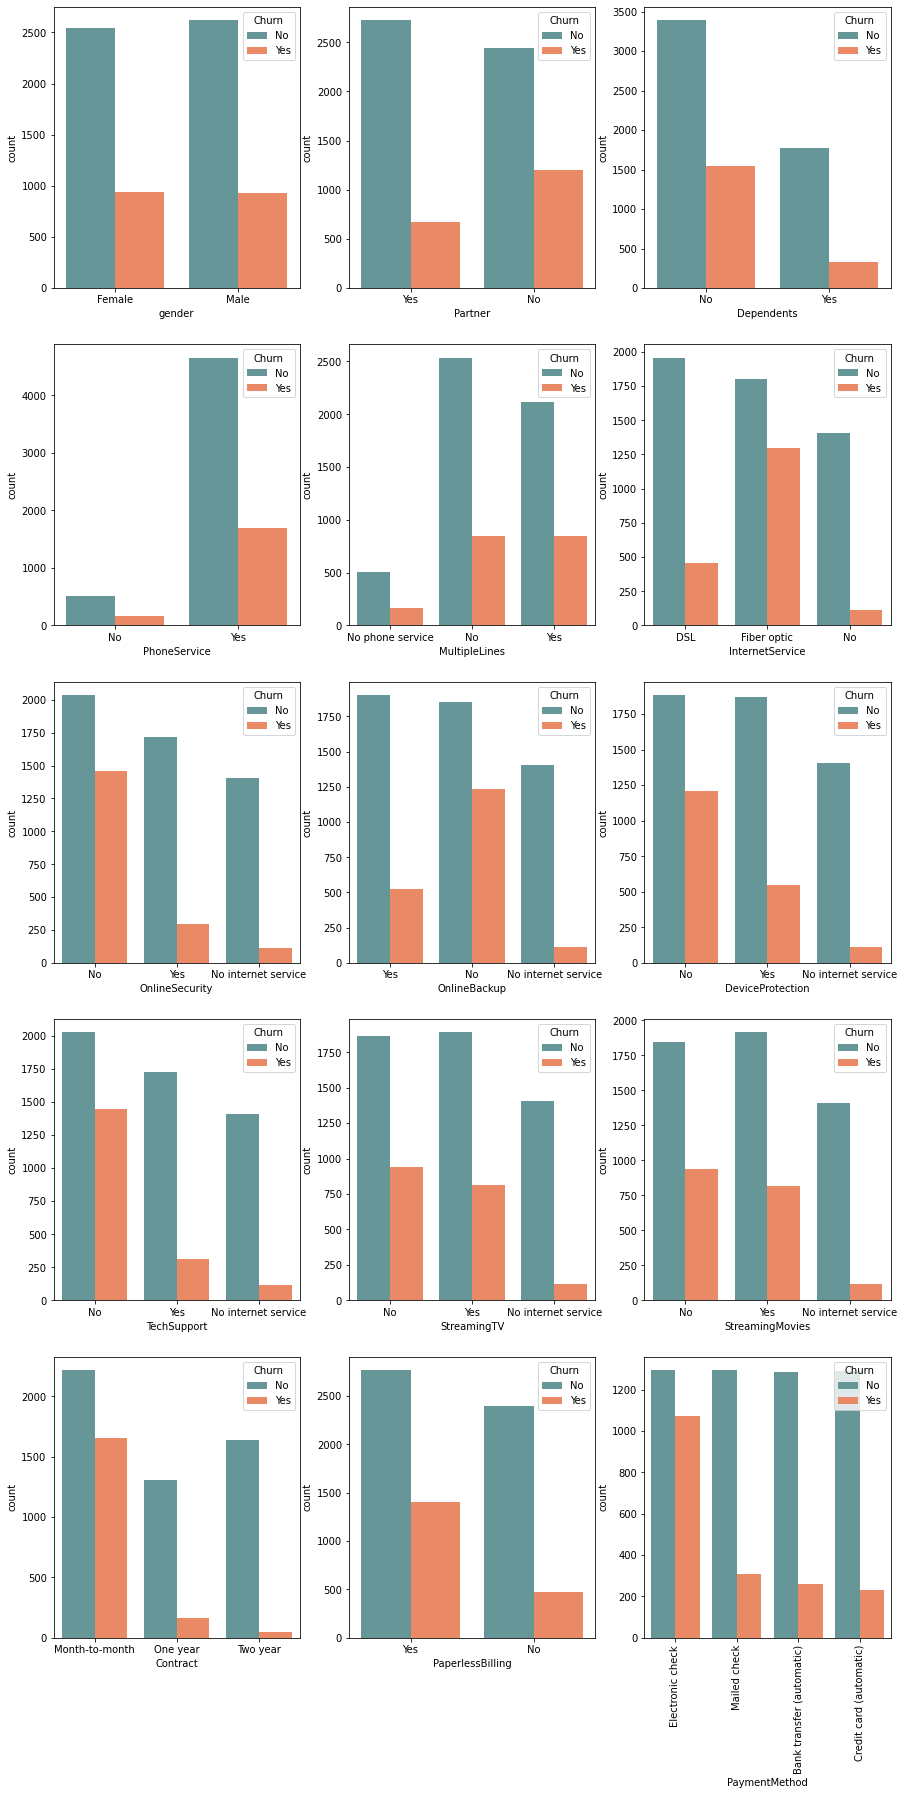

In [15]:
fig, axes = plt.subplots(nrows = 5,ncols = 3,figsize = (15,30))
sns.countplot(x = "gender", data = df, ax=axes[0][0], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "Partner", data = df, ax=axes[0][1], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "Dependents", data = df, ax=axes[0][2], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "PhoneService", data = df, ax=axes[1][0], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "MultipleLines", data = df, ax=axes[1][1], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "InternetService", data = df, ax=axes[1][2], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "OnlineSecurity", data = df, ax=axes[2][0], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "OnlineBackup", data = df, ax=axes[2][1], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "DeviceProtection", data = df, ax=axes[2][2], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "TechSupport", data = df, ax=axes[3][0], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "StreamingTV", data = df, ax=axes[3][1], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "StreamingMovies", data = df, ax=axes[3][2], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "Contract", data = df, ax=axes[4][0], hue='Churn', palette=['cadetblue','coral'])
sns.countplot(x = "PaperlessBilling", data = df, ax=axes[4][1], hue='Churn', palette=['cadetblue','coral'])
ax = sns.countplot(x = "PaymentMethod", data = df, ax=axes[4][2], hue='Churn', palette=['cadetblue','coral'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

##Tenure, Montly Charges, and Total Charges

In [16]:
def distribution(column, data):
    skewness = data[column].skew()
    print('Skewness of column {} is {}'.format(column,skewness))
    sns.set(style='ticks')
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={'height_ratios': (.15, .85)})

    sns.boxplot(data[column], ax=ax_box, color = 'cadetblue')
    sns.distplot(data[column], ax=ax_hist, color = 'cadetblue')

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

Skewness of column tenure is 0.23773083190513133


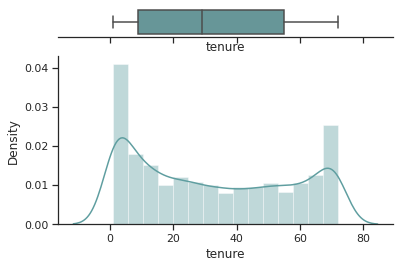

In [17]:
distribution('tenure', df)

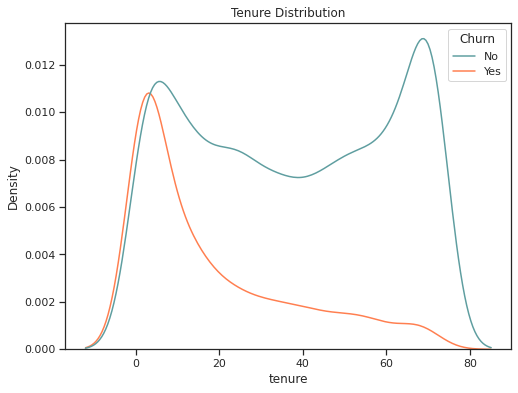

In [18]:
#Tenure kdeplot
plt.figure(figsize = (8,6))
ax = sns.kdeplot('tenure', data=df, hue='Churn', palette=['cadetblue','coral'])
ax.set_title('Tenure Distribution')
plt.show()

Skewness of column MonthlyCharges is -0.22210292770166232


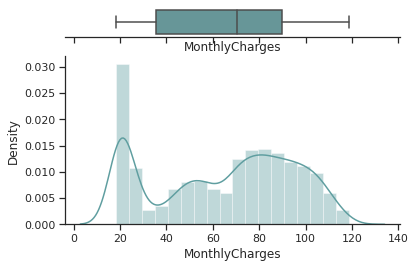

In [19]:
distribution('MonthlyCharges', df)

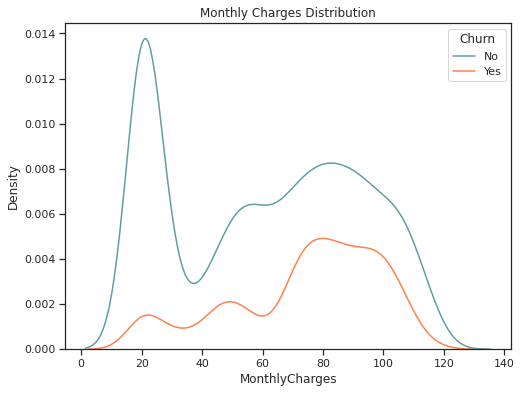

In [20]:
#Monthly Charges kdeplot
plt.figure(figsize = (8,6))
ax = sns.kdeplot('MonthlyCharges', data=df, hue='Churn', palette=['cadetblue','coral'])
ax.set_title('Monthly Charges Distribution')
plt.show()

Skewness of column TotalCharges is 0.9616424997242504


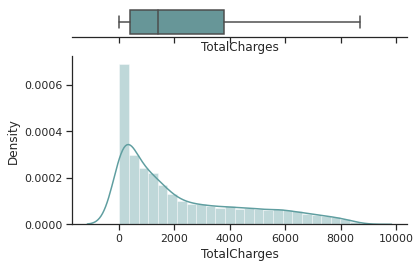

In [21]:
distribution('TotalCharges', df)

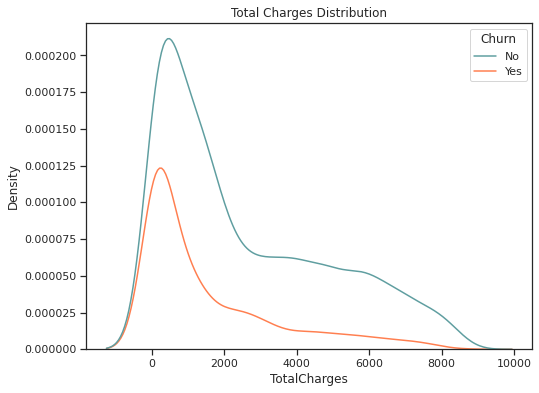

In [22]:
#Monthly Charges kdeplot
plt.figure(figsize = (8,6))
ax = sns.kdeplot('TotalCharges', data=df, hue='Churn', palette=['cadetblue','coral'])
ax.set_title('Total Charges Distribution')
plt.show()

#Feature Engineering

##Encode Categorical Data

In [23]:
df_model = df.drop('customerID', axis=1)
df_model.head()

,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,France,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
le = LabelEncoder()

For categorical columns in the form of 'Yes' or 'No', Label Encoding will be carried out (Yes = 1, No = 0). While the categorical column containing 'Yes', 'No', 'No phone service', or 'No internet service' will be manually encoded, i.e. Yes will be 1 and No / No phone service / No internet service will be 0.

In [25]:
df_model['gender'] = le.fit_transform(df_model['gender'])
df_model['Partner'] = le.fit_transform(df_model['Partner'])
df_model['Dependents'] = le.fit_transform(df_model['Dependents'])
df_model['PhoneService'] = le.fit_transform(df_model['PhoneService'])
df_model['PaperlessBilling'] = le.fit_transform(df_model['PaperlessBilling'])
df_model['Churn'] = le.fit_transform(df_model['Churn'])
df_model['MultipleLines'] = np.where(df_model['MultipleLines']=='Yes', 1,0)
df_model['OnlineSecurity'] = np.where(df_model['OnlineSecurity']=='Yes', 1,0)
df_model['OnlineBackup'] = np.where(df_model['OnlineBackup']=='Yes', 1,0)
df_model['DeviceProtection'] = np.where(df_model['DeviceProtection']=='Yes', 1,0)
df_model['TechSupport'] = np.where(df_model['TechSupport']=='Yes', 1,0)
df_model['StreamingTV'] = np.where(df_model['StreamingTV']=='Yes', 1,0)
df_model['StreamingMovies'] = np.where(df_model['StreamingMovies']=='Yes', 1,0)
df_model.head()

,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,France,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,France,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,France,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,France,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,France,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


For the Region, InternetService, Contract, and PaymentMethod columns, get_dummies will be carried out because the values have no ranking. One of the get_dummies result columns will be dropped to reduce multicollinearity.

In [26]:
Region = pd.get_dummies(df_model['Region'], prefix = 'Region')
InternetService = pd.get_dummies(df_model['InternetService'], prefix = 'InternetService')
Contract	= pd.get_dummies(df_model['Contract'], prefix = 'Contract')
PaymentMethod	= pd.get_dummies(df_model['PaymentMethod'], prefix = 'PaymentMethod')
df_model = pd.concat([df_model, Region, InternetService,
                       Contract, PaymentMethod],axis=1)
df_model = df_model.drop(['Region', 'InternetService',
                            'Contract', 'PaymentMethod'], axis=1)
df_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Region_England,Region_France,Region_Germany,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,0,1,0,1,0,0,0,0,1,0


In [27]:
df_model = df_model.drop(['Region_England','InternetService_No','Contract_Month-to-month','PaymentMethod_Bank transfer (automatic)'],axis=1)

In [28]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

The data resulting from get_dummies is still in the form of uint8, so the data type must be converted into an integer first.

In [29]:
def convert_to_int(dataframe_series):
    if dataframe_series.dtype=='uint8':
        dataframe_series = dataframe_series.astype('int')
    return dataframe_series
df_model = df_model.apply(lambda x: convert_to_int(x))

In [30]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

#Correlation

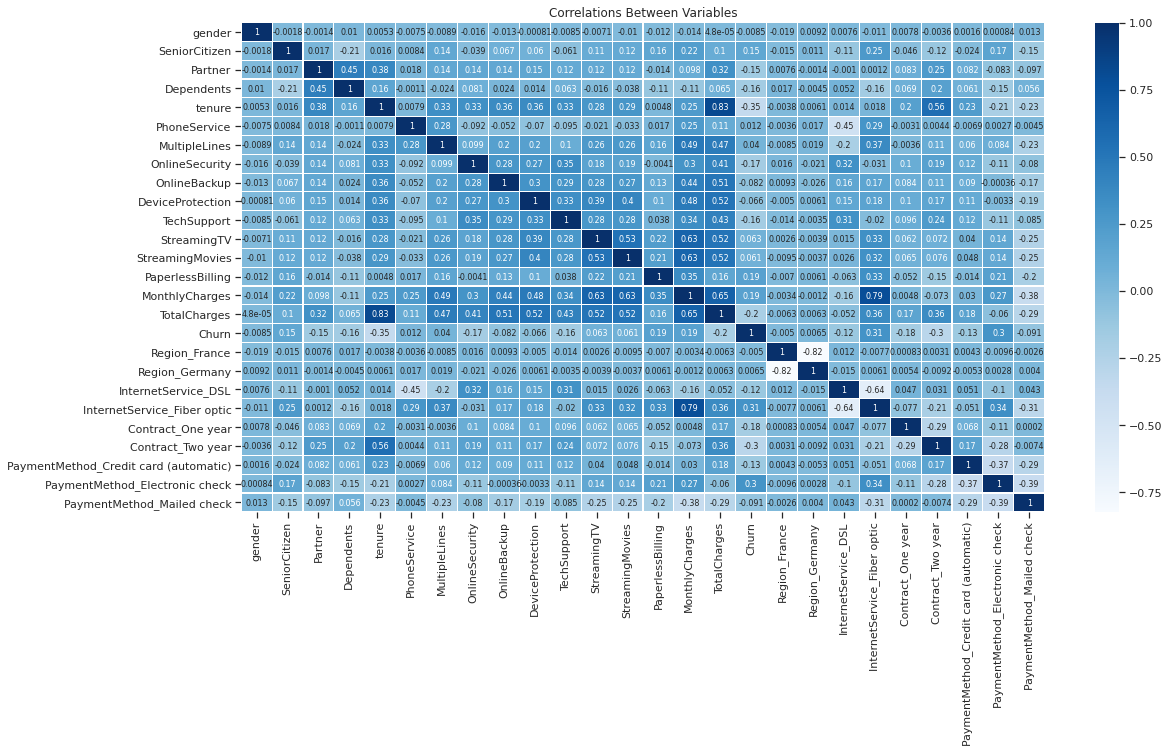

In [31]:
#Correlations between variables
fig, ax = plt.subplots(figsize=(18,9))  
sns.heatmap(data=df_model.corr(), annot=True, annot_kws={"fontsize":8}, cmap = plt.cm.Blues, linewidths=.1, ax=ax).set_title('Correlations Between Variables');

#Modeling

##Split Data

MonthlyCharges and PhoneService columns will not be used to reduce multicollinearity in the data.

In [32]:
#Define features and target
X = df_model.drop(['Churn','PhoneService','MonthlyCharges'], axis=1)
y = df_model['Churn']

In [33]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'TotalCharges', 'Region_France', 'Region_Germany',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

The data will be converted to a scale of 0-1

In [34]:
X = (X-np.min(X))/(np.max(X)-np.min(X)).values
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,TotalCharges,Region_France,Region_Germany,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.001275,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.215867,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.010310,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.210241,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.015330,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 23), (1758, 23), (5274,), (1758,))

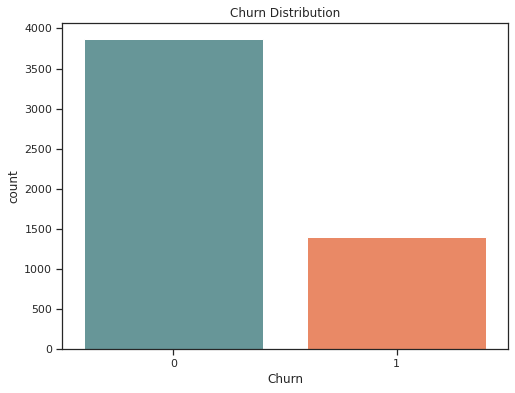

In [36]:
plt.figure(figsize = (8,6))
ax = sns.countplot(y_train, palette=['cadetblue','coral'])
ax.set_title('Churn Distribution')
plt.show()

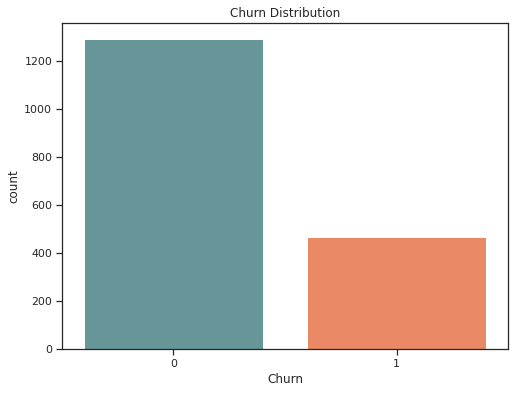

In [37]:
plt.figure(figsize = (8,6))
ax = sns.countplot(y_test, palette=['cadetblue','coral'])
ax.set_title('Churn Distribution')
plt.show()

##Create Base Model

In [38]:
model = {'RandomForest' : RandomForestClassifier(),
         'Gaussian NB' : GaussianNB(),
         'KNN' : KNeighborsClassifier(),
         'SVM' : SVC(),
         'Neural Network' : MLPClassifier(),
         'Extra Tree' : ExtraTreesClassifier(),
         'Logistic Regression' : LogisticRegression(),
         'XGBoost' : XGBClassifier(),
         'LightGBM' : LGBMClassifier()}
result={}
for key,value in model.items():
  model = value
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  result[key]=accuracy
  print('{}: {}'.format(key, accuracy_score(y_test, y_pred)))

RandomForest: 0.782707622298066
Gaussian NB: 0.7389078498293515
KNN: 0.7633674630261661
SVM: 0.7946530147895335
Neural Network: 0.7741751990898749
Extra Tree: 0.7667804323094426
Logistic Regression: 0.8048919226393629
XGBoost: 0.7935153583617748
LightGBM: 0.7901023890784983


In [39]:
base_model = pd.DataFrame(result.items(), columns=['Model', 'Accuracy'])
base_model = base_model.sort_values('Accuracy', ascending=False).reset_index(drop=True)
base_model

,Model,Accuracy
0,Logistic Regression,0.804892
1,SVM,0.794653
2,XGBoost,0.793515
3,LightGBM,0.790102
4,RandomForest,0.782708
5,Neural Network,0.774175
6,Extra Tree,0.766780
7,KNN,0.763367
8,Gaussian NB,0.738908


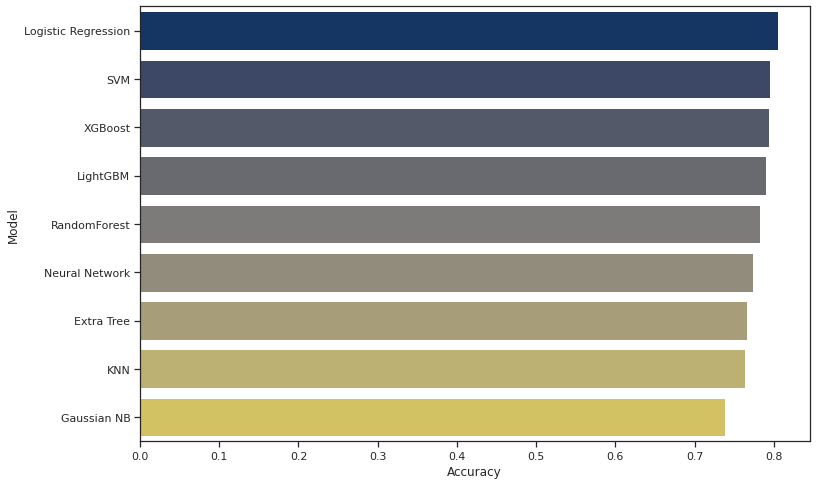

In [40]:
plt.figure(figsize=(12,8))
ax=sns.barplot(y='Model', x='Accuracy', data=base_model, palette='cividis')
plt.show()

##Confusion Matrix for Top 4 Base Model

###XGBoost

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.64      0.50      0.56       467

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



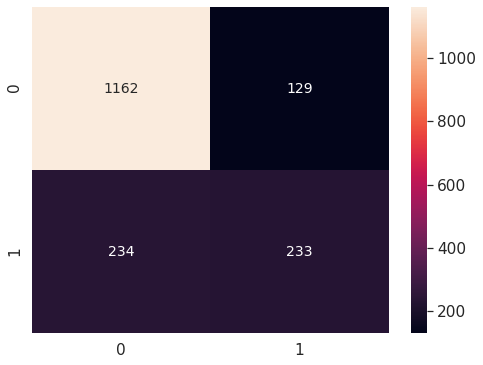

In [41]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size

plt.show()

In [42]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

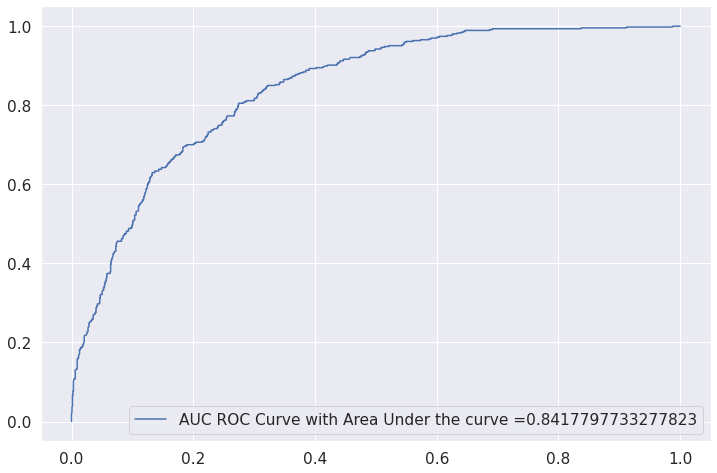

In [43]:
generate_auc_roc_curve(xgb, X_test)

###Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.61       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



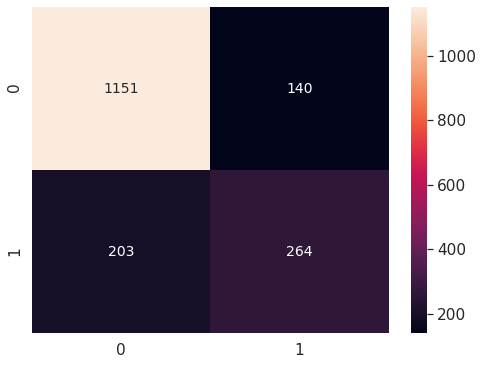

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size

plt.show()

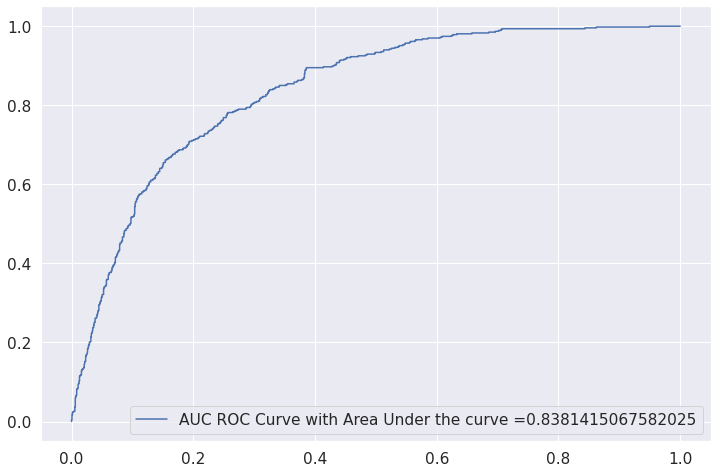

In [45]:
generate_auc_roc_curve(logreg, X_test)

###LightGBM

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.63      0.52      0.57       467

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



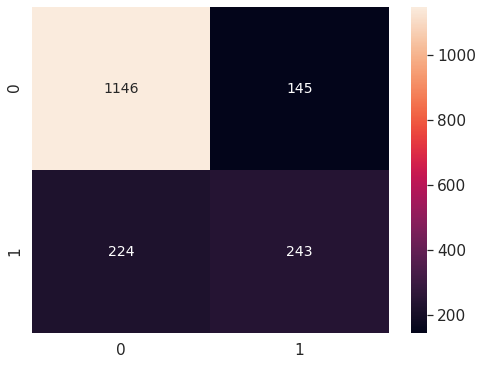

In [46]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size

plt.show()

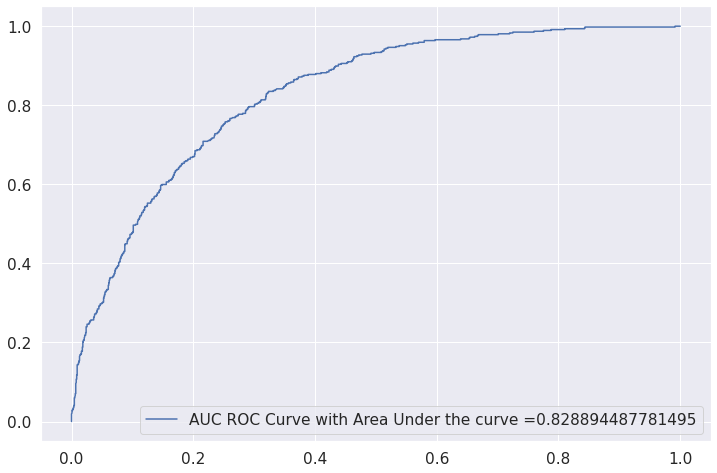

In [47]:
generate_auc_roc_curve(lgbm, X_test)

###SVM

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1291
           1       0.65      0.50      0.57       467

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.78      0.79      0.79      1758



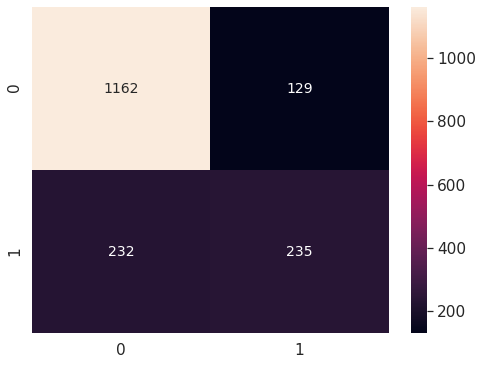

In [48]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size

plt.show()

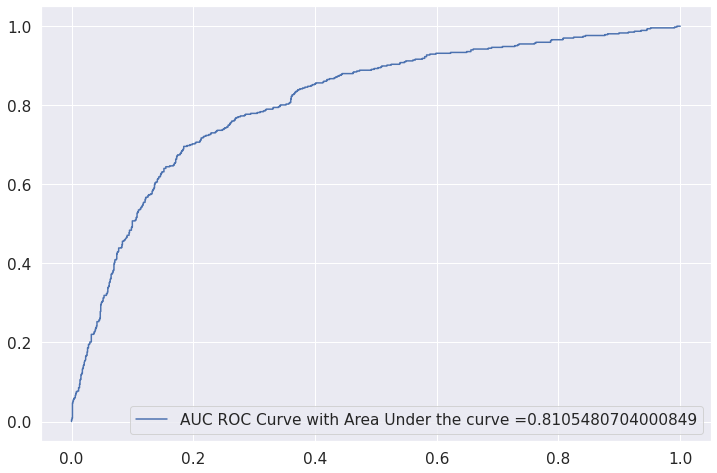

In [49]:
generate_auc_roc_curve(svm, X_test)

#Hyperparameter Tuning

###XGBoost

In [50]:
params={
    "learning_rate"    : [0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 2, 3, 4, 5],
    "min_child_weight" : [ 1, 3, 5],
    "gamma"            : [0, 0.1, 0.2 , 0.3, 0.4],
    "alpha"            : [0, 1, 5, 10],
    "colsample_bytree" : [ 0.4, 0.5 , 0.7, 1 ],
    "n_estimators"     : [100, 300, 1000],
    "reg_alpha"        : [0, 1, 1.5, 10]
}

In [51]:
classifier=XGBClassifier()
xgb_random=RandomizedSearchCV(classifier,param_distributions=params,n_iter=20,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   param_distributions={'alpha': [0, 1, 5, 10],
                                        'colsample_bytree': [0.4, 0.5, 0.7, 1],
                                 

In [52]:
print("BEST PARAMETERS: " + str(xgb_random.best_params_))
print("BEST CV SCORE: " + str(xgb_random.best_score_))

BEST PARAMETERS: {'reg_alpha': 10, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.4, 'alpha': 0}
BEST CV SCORE: 0.8071662005269926


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.65      0.53      0.59       467

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



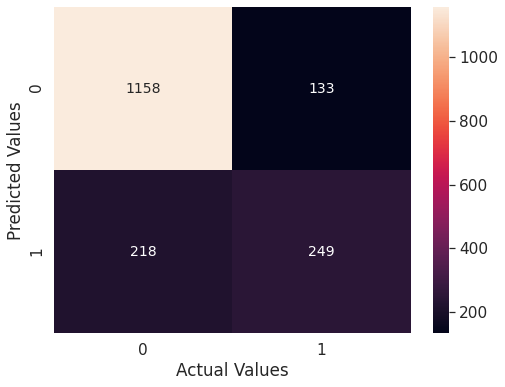

In [53]:
y_pred = xgb_random.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.show()

##Logistic Regression

In [54]:
# Create the parameter grid based on the results of random search 
param_grid = { 'C' : [1e-3,1e-2,1e-1,1,10,100],
               'penalty': ['l1', 'l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# Create a based model
logreg= LogisticRegression()
# Instantiate the grid search model
logreg_grid = RandomizedSearchCV(logreg,param_distributions=param_grid,n_iter=20,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [55]:
%%time
logreg_grid.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.3s


CPU times: user 558 ms, sys: 52.6 ms, total: 611 ms
Wall time: 4.95 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.9s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sa

In [56]:
print("BEST PARAMETERS: " + str(logreg_grid.best_params_))
print("BEST CV SCORE: " + str(logreg_grid.best_score_))

BEST PARAMETERS: {'solver': 'sag', 'penalty': 'l2', 'C': 100}
BEST CV SCORE: 0.8447620611342319


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.66      0.57      0.61       467

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



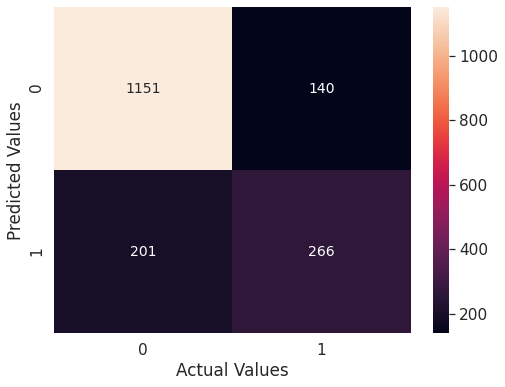

In [57]:
y_pred = logreg_grid.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

##LightGBM

In [58]:
params={'boosting_type':['gdbt','dart'],
        'max_bin':[5,10],
        'n_estimators': [2000, 2500],
        'max_depth':  [4, 5],
        'num_leaves': [63, 127],
        'subsample': [0.6, 0.7],
        'colsample_bytree': [0.6, 0.7]}

In [59]:
classifier=LGBMClassifier()
lgbm_random=RandomizedSearchCV(classifier,param_distributions=params,n_iter=20,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
lgbm_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                            subsample_freq=0),
                   iid='deprecated', n_iter=20, n_jobs=-1,
   

In [60]:
print("BEST PARAMETERS: " + str(lgbm_random.best_params_))
print("BEST CV SCORE: " + str(lgbm_random.best_score_))

BEST PARAMETERS: {'subsample': 0.7, 'num_leaves': 127, 'n_estimators': 2000, 'max_depth': 4, 'max_bin': 10, 'colsample_bytree': 0.6, 'boosting_type': 'dart'}
BEST CV SCORE: 0.794463339838305


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.63      0.53      0.58       467

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



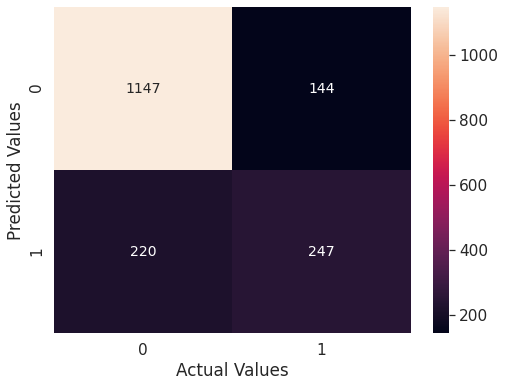

In [61]:
y_pred = lgbm_random.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

##SVM

In [62]:
# Create the parameter grid based on the results of random search 
param_grid = { 'C' : [1e-3,1e-2,1e-1,1,10,100],
               'gamma': [1e-3,0.01,0.1,1,10,100]}
# Create a based model
svm = SVC()
# Instantiate the grid search model
svm_grid = RandomizedSearchCV(svm,param_distributions=param_grid,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [63]:
%%time
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.7s finished


CPU times: user 1.37 s, sys: 53 ms, total: 1.42 s
Wall time: 44.7 s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                  100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=3)

In [64]:
print("BEST PARAMETERS: " + str(svm_grid.best_params_))
print("BEST CV SCORE: " + str(svm_grid.best_score_))

BEST PARAMETERS: {'gamma': 0.001, 'C': 100}
BEST CV SCORE: 0.8354837110650312


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.63      0.53      0.58       467

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



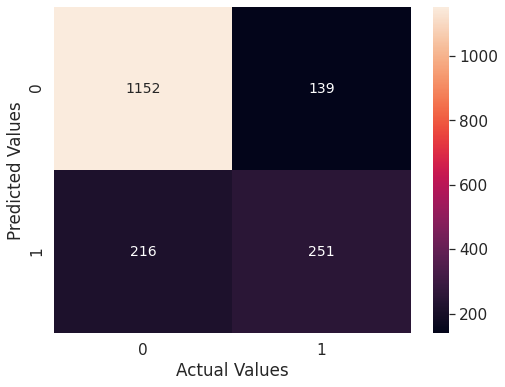

In [65]:
y2_pred = svm_grid.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y2_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

plt.show()

#VotingClassifier

In [73]:
%%time
from sklearn.ensemble import VotingClassifier
clf1 = XGBClassifier(reg_alpha= 10, n_estimators= 300, min_child_weight= 3, max_depth= 3, learning_rate= 0.15, gamma= 0.4, colsample_bytree= 0.4, alpha= 0)
clf2 = LogisticRegression(solver= 'sag', penalty= 'l2', C= 100)
clf3 = LGBMClassifier(subsample= 0.6, num_leaves= 127, n_estimators= 2000, max_depth= 4, max_bin= 10, colsample_bytree= 0.7, boosting_type= 'dart')
clf4 = SVC(probability=True,gamma= 0.001, C= 100)
eclf1 = VotingClassifier(estimators=[('xgb', clf1), ('lr', clf2),('lgbm', clf3), ('svm', clf4)], 
                         voting='soft',
                         weights=[6, 7, 1, 1])
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print('Accuracy test: %.3f'%accuracy_score(y_test, predictions))
print('Accuracy train: %.3f'%accuracy_score(y_train, eclf1.predict(X_train)))

Accuracy test: 0.811
Accuracy train: 0.814
CPU times: user 34.2 s, sys: 346 ms, total: 34.6 s
Wall time: 34.4 s


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1291
           1       0.67      0.56      0.61       467

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



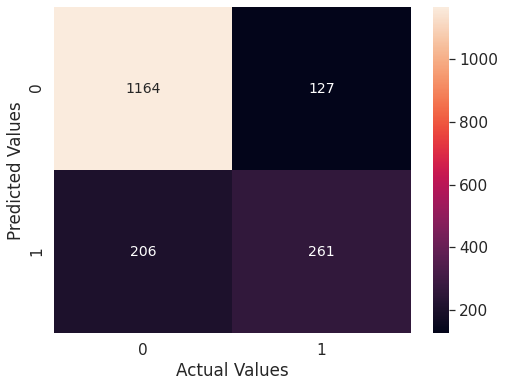

In [74]:
y_pred = eclf1.predict(X_test)
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='g') # font size
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.show()

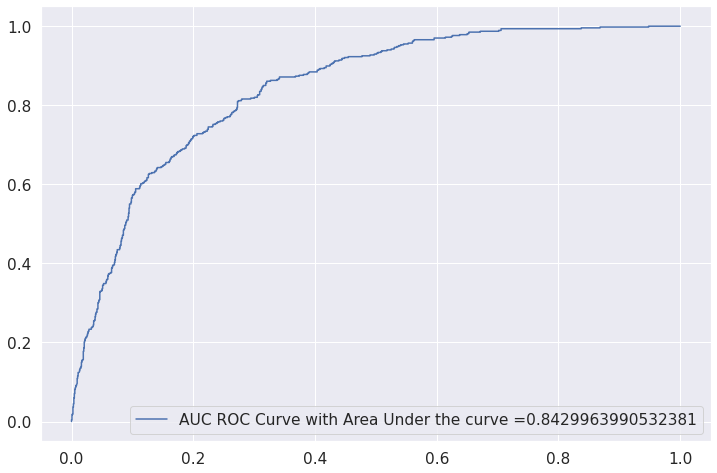

In [75]:
generate_auc_roc_curve(eclf1, X_test)

#Is it profitable if the company predicts customer churn?

We assume the cost for the promotion is -30. The profit if customer retains is 100 and the loss if customer churn is -100.

In [76]:
cost = pd.DataFrame({'cost_to_retain' : [-30],
                     'benefit' : [100],
                     'loss' : [-100]})
cost

,cost_to_retain,benefit,loss
0,-30,100,-100


In [77]:
cm

array([[1164,  127],
       [ 206,  261]])

In [78]:
#No Treatment
churn_cust = cm[0][1] + cm[1][1]
lost = churn_cust*cost['loss']
print("Costs incurred if the customer churn prediction is not carried out {}".format(lost[0]))

Costs incurred if the customer churn prediction is not carried out -38800




*   Quadrant 1: Predicted 0 (not churn) and actual 0 (not churn). We don't do promotions or special treatment for customers in quadrant 1, because they still use our provider.
* Quadrant 2: Predicted 0 (not churn) and actual 1 (churn). We will not be doing promotions to these customers, because they are predicted to churn. There will be a loss, because in fact this customer will churn.
* Quadrant 3: Predicted 1 (churn) and actual 0 (not churn). We will do a promotion to this customer, because it is predicted that there will be churn. However, there is no added benefit or loss, because in reality these customers will not churn.  
* Quadrant 4: Predicted 1 (churn) and actual 1 (churn). We will do a promotion to this customer, because it is predicted that there will be churn. There will be benefits, because in fact this customer will churn.



In [79]:
#Treatment
Quadrant_1 = 0
Quadrant_2 = (cm[0][1] * cost['loss'])[0]
Quadrant_3 = (cm[1][0] * cost['cost_to_retain'])[0]
Quadrant_4 = (cm[1][1] * cost['cost_to_retain'])[0] + (cm[1][1] * cost['benefit'])[0]
sum_cost = Quadrant_1 + Quadrant_2 + Quadrant_3 + Quadrant_4
print("Costs incurred if the customer churn prediction is carried out {}".format(sum_cost))

Costs incurred if the customer churn prediction is carried out -610


#**CONCLUSION**
If **the company does not carry out the customer churn prediction**, the company will suffer a loss of **-38800** due to churned customers.<br>
If **the company carries out a customer churn prediction**, the company will spend **-610** for promotion costs so that customers retain.<br>
So, companies are more profitable if they perform customer churn prediction.